# Lab2 - Concrete compressive strength regression (35 marks total)
Author: Jashraj Dubal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 0. Function definitions (2 marks)

To find the best model, we follow the published article where root-mean squared error (rms) was used as a score function. The rms score function needs to be minimized, because the optimal score is 0, larger values are worse performances

In scikit-learn, only *maximization* is implemented. Hence, it is customary to maximize the *negative* rms. scitkit-learn provides a scoring function `neg_root_mean_squared_error`

In [53]:
from sklearn.model_selection import cross_validate


def get_regressor_neg_rms(model, X, y, cv=7):
    '''Calculate train and validation score for regressor (model) using cross-validation
        
        score is negative root mean-squared error (rms)
        
        model (sklearn classifier): Regressor to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        
        returns: mean training negative rms, mean validation negative rms
    
    '''
    
    #TODO: add function body here
    
    # cv_results stores the results of cross validation
    cv_results = cross_validate(model, X, y, cv=cv, scoring='neg_root_mean_squared_error', return_train_score=True)
    return cv_results['train_score'].mean(), cv_results['test_score'].mean()

## 1. Load data (1 mark each for 3 total marks)
yellowbrick concrete  
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Load the Dataset object with `load_concrete()` using `return_dataset=True`

Print the README of the Dataset object


In [17]:
#TODO: load the yellowbrick concrete Dataset object and access the README
import yellowbrick.datasets as ybds
concrete = ybds.load_concrete(return_dataset=True)
print(concrete.README)

# Concrete Compressive Strength

**Downloaded from the UCI Machine Learning Repository on October 13, 2016.**

- Multivariate Data Set
- Real Attributes
- 1,030 Instances
- 9 attributes
- Well suited for _regression_ tasks
- [https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength](https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength)

## Abstract

Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients.

## Description

Given are the variable name, variable type, the measurement unit and a brief description. The concrete compressive strength is the regression problem. The order of this listing corresponds to the order of numerals along the rows of the database.

## Attributes

- cement (kg)
- blast furnace slag (kg)
- fly ash (kg)
- water (kg)
- superplasticizer (kg)
- coarse aggregate (kg)
- fine aggregate (kg)
- age (day)
- compressive strength (MPa)

## Citat

Units noted from README:
- cement (kg)
- blast furnace slag (kg)
- fly ash (kg)
- water (kg)
- superplasticizer (kg)
- coarse aggregate (kg)
- fine aggregate (kg)
- age (day)
- compressive strength (MPa)

### *Question 1:* What is the target variable name and units in this dataset?

In [12]:
print(concrete.meta)

{'features': ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age'], 'target': 'strength'}


The target variable is compressive strength `strength` and the units are MPa

### 1.1 Prepare the feature matrix and target vector
Load the concrete data set into feature matrix `X` and target vector `y`

Print dimensions and type of `X`, `y`

In [51]:
#TODO: Load feature matrix X and target vector y, print shapes
concrete_data = concrete.to_dataframe()
X = concrete_data.drop('strength', axis=1)
y = concrete_data['strength']
print(X.shape)
print(y.shape)

(1030, 8)
(1030,)


## 2. Inspect the data (1 mark each for 4 total marks)

### 2.1 Range of each feature
To get an idea if the features are on the same scale, we inspect the range of features

Print the minimum and maximum of each feature in `X`

In [25]:
# TODO: print range (minimum and maximum) of features
# Define the format string
fmt = "Feature: {:>10} \t Min: {:>10.2f} \t Max: {:>10.2f}"

# Print the range of features
for col in X.columns:
    print(fmt.format(col, X[col].min(), X[col].max()))

Feature:     cement 	 Min:     102.00 	 Max:     540.00
Feature:       slag 	 Min:       0.00 	 Max:     359.40
Feature:        ash 	 Min:       0.00 	 Max:     200.10
Feature:      water 	 Min:     121.75 	 Max:     247.00
Feature:     splast 	 Min:       0.00 	 Max:      32.20
Feature:     coarse 	 Min:     801.00 	 Max:    1145.00
Feature:       fine 	 Min:     594.00 	 Max:     992.60
Feature:        age 	 Min:       1.00 	 Max:     365.00


### 2.2 Boxplot of features 
Using seaborn boxplot, plot all features. This provides a visual view of feature ranges

Add y-axis label indicating units, and a title

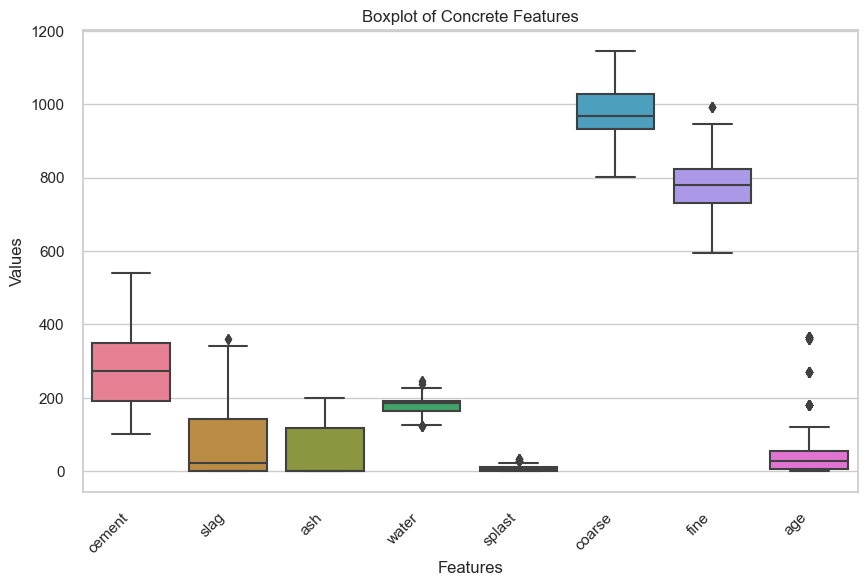

In [31]:
#TODO: add boxplot of features

# Create a boxplot of the features
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.boxplot(data=X, palette="husl")

# Set the title and axis labels
plt.title("Boxplot of Concrete Features")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

### 2.3 Correlation heatmap of features 

To understand if pairs of features are potentially related, contain similar information, pair-wise cross-correlation can be calculated. Models benefit most from un-correlated features.

Using pandas `corr()` method, create the cross-correlations between all features. Plot this cross-correlation object using seaborn `heatmap()` with parameters `vmin=-1, vmax=1, annot=True, cmap='BrBG'`. Add a title.

Pandas `corr()` calculates [Pearson correlation ](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) :
>  It has a value between +1 and −1. A value of +1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

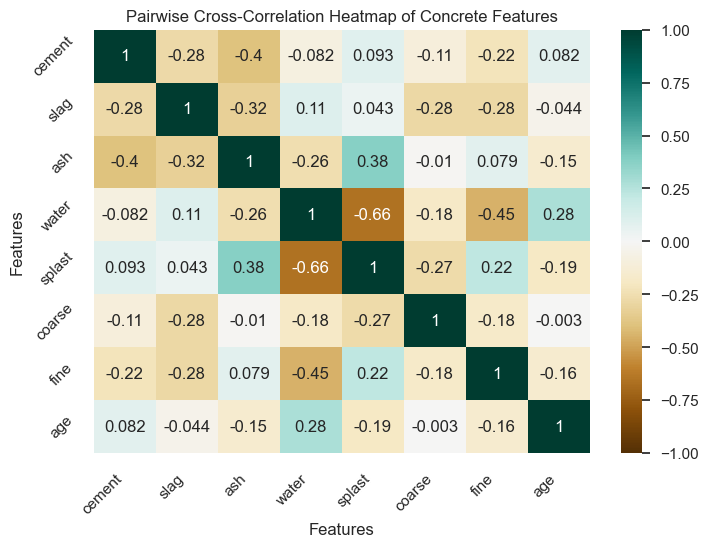

In [33]:
# TODO: add pairwise cross-correlation heatmap of features

# Get the correlation matrix
corr_matrix = X.corr()

# Plot seaborn heatmap with params vmin - 1, vmax - 1, annot - True, cmap - "BrBG"
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap="BrBG")
plt.title("Pairwise Cross-Correlation Heatmap of Concrete Features")
plt.xlabel("Features")
plt.ylabel("Features")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.show()

### 2.4 Histogram of target variable 

To understand if all target values are equally represented in the data, we analyze how many samples of each target value we have available. The histogram of the target vector can visualize this distribution.

Using seaborn `displot()`, plot the histogram of the target vector. Add a title.

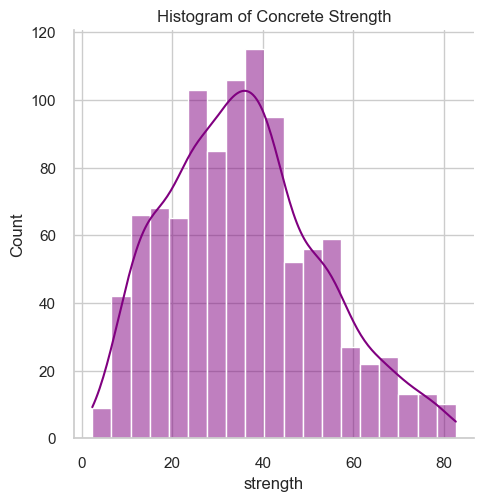

In [40]:
#TODO: Add histogram of targect vector

# Plot a histogram of the target vector
sns.displot(y, kde=True, color="purple")
plt.title("Histogram of Concrete Strength")
plt.show()

## 3. Create training and test sets (1 mark)

Using scikit-learn `train_test_split()` with parameters `random_state=37`, `test_size=0.2`, split `X` and `y` into training and test sets

In [41]:
from sklearn.model_selection import train_test_split

In [44]:
# TODO: train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(824, 8)
(206, 8)
(824,)
(206,)


## 4. Compare models using cross-validation (3 marks)

Create a list containing a `LinearRegression()`, `RandomForestRegressor(random_state=64)` and `GradientBoostingRegressor(random_state=79)` objects.

Iterate this list and:
- using `X_train` and `y_train`
- compute the negative root mean-squared error using the `get_regressor_neg_rms()` function
- and print the training and validation scores with **2 decimal places**
- Use 7-fold cross-validation

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [58]:
#TODO: Calling get_regressor_neg_rms() for each model

# Create a list of models
models = [LinearRegression(),
          RandomForestRegressor(random_state=64),
          GradientBoostingRegressor(random_state=79)]

for model in models:
    # Compute negative root mean squared error for each model
    train_score, test_score = get_regressor_neg_rms(model, X_train, y_train, cv=7)
    
    # Format the output string
    output_string = "{:<30}\tTraining Score: {:.2f}\tValidation Score: {:.2f}".format(model.__class__.__name__, train_score, test_score)
    
    # Print the output string
    print(output_string)

LinearRegression              	Training Score: -10.29	Validation Score: -10.39
RandomForestRegressor         	Training Score: -2.12	Validation Score: -4.97
GradientBoostingRegressor     	Training Score: -3.69	Validation Score: -4.98


### *Question 2:* For each of the three models, state if models are potentially over- or underfitting and why (3 marks)

`LinearRegression:` For the LinearRegression model, both the training and validation scores are relatively high, indicating that the model is not performing well on either the training or validation sets. This may indicate that the model is **underfitting** the data and is not able to capture the underlying patterns in the data.

`RandomForestRegressor:` For the RandomForestRegressor model, the training score is relatively high, while the validation score is relatively low. This may indicate that the model is slightly **overfitting** and the data and is not able to generalize well to the validation set.

`GradientBoostingRegressor:` For the GradientBoostingRegressor model, the training score is relatively high, while the validation score is relatively low. This may indicate that the model is slightly **overfitting** and the data and is not able to generalize well to the validation set.

## 5. Find a better model (3 marks)

Use the `RandomForestRegressor(random_state=64)` and find the best combination of `max_depth` from the list of `[10, 15, 20]`, and `n_estimators` from the list of `[100, 200, 400]`

Use nested for-loops to iterate these two lists:
- using `X_train` and `y_train`
- compute the negative root mean-squared error of the corresponding `RandomForestRegressor(random_state=64)` using the `get_regressor_neg_rms()` function 
- and print the training and validation scores with **2 decimal places**
- Use 7-fold cross-validation

Report the best validation score and the corresponding model

Note: We expect that more trees (larger `n_estimators`) yield better model performance

In [73]:
#TODO: Using nested for loops iterate parameter combinations and print results
# TODO: Using nested for loops iterate parameter combinations and print results

# Define the hyperparameters to try
max_depths = [10, 15, 20]
n_estimators = [100, 200, 400]

# Store the validation scores for each model
validation_scores = {}

# Iterate over the hyperparameter combinations
for max_depth in max_depths:
    for n_estimator in n_estimators:
        # Create a new model with the current hyperparameters
        model = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimator, random_state=64)
        
        # Train and evaluate the model
        training_score, validation_score = get_regressor_neg_rms(model, X_train, y_train, cv=7)
        
        # Format and print the output string
        output_string = "Max Depth: {:<10}\tEstimators: {:<10}\tTraining Score: {:.2f}\tValidation Score: {:.2f}".format(max_depth, n_estimator, training_score, validation_score)
        print(output_string)
        
        # Store the validation score and corresponding model parameters
        validation_scores.update({validation_score: [model.get_params(), training_score]})
        
# Print the model with the best validation score
best_score = max(validation_scores)
best_params = validation_scores[best_score][0]
best_train_score = validation_scores[best_score][1]
print("Best Validation Score: {:.2f}".format(best_score))
print("Training Score: {:.2f}".format(best_train_score))
print("Model Parameters: Max Depth = {}, Estimators = {}".format(best_params['max_depth'], best_params['n_estimators']))

Max Depth: 10        	Estimators: 100       	Training Score: -2.44	Validation Score: -5.09
Max Depth: 10        	Estimators: 200       	Training Score: -2.42	Validation Score: -5.06
Max Depth: 10        	Estimators: 400       	Training Score: -2.41	Validation Score: -5.06
Max Depth: 15        	Estimators: 100       	Training Score: -2.12	Validation Score: -4.97
Max Depth: 15        	Estimators: 200       	Training Score: -2.11	Validation Score: -4.93
Max Depth: 15        	Estimators: 400       	Training Score: -2.10	Validation Score: -4.93
Max Depth: 20        	Estimators: 100       	Training Score: -2.12	Validation Score: -4.97
Max Depth: 20        	Estimators: 200       	Training Score: -2.11	Validation Score: -4.93
Max Depth: 20        	Estimators: 400       	Training Score: -2.09	Validation Score: -4.92
Best Validation Score: -4.92
Training Score: -2.09
Model Parameters: Max Depth = 20, Estimators = 400


### *Question 3:* Which combination of `max_depth` and `n_estimators` produced the best validation score? Report both training and validation scores here (2 marks)

From the code above, we can see that the best validation score is -4.92 and the corresponding model is `RandomForestRegressor(max_depth=20, n_estimators=400, random_state=64)`. This model has a training score of -2.09 and a validation score of -4.92.

## 6. Retrain best model (2 marks)

Create a `RandomForestRegressor(random_state=64)` with the best pair of `max_depth` and `n_estimators`, and retrain this model on all training data.

In [79]:
#TODO: retrain the best estimator
max_depth = best_params['max_depth']
n_estimators = best_params['n_estimators']

model = RandomForestRegressor(max_depth=max_depth, n_estimators=n_estimators, random_state=64)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=400, random_state=64)

## 7. Evaluate best model on training and test data
### 7.1 Root mean-squared error and $R^2$ (3 marks)

For the retrained best estimator, print the root mean-squared error (**2 decimal places**) and R-squared (**3 decimal places**) for training and test sets.

In [76]:
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
# TODO: print rms and r-squared for training and test set
# Assuming this is without 7 fold cross validation
training_rms, test_rms = mean_squared_error(y_train, model.predict(X_train), squared=False), mean_squared_error(y_test, model.predict(X_test), squared=False)
training_r2, test_r2 = r2_score(y_train, model.predict(X_train)), r2_score(y_test, model.predict(X_test))

print("Training RMS: {:.2f}".format(training_rms))
print("Test RMS: {:.2f}".format(test_rms))
print("Training R2: {:.3f}".format(training_r2))
print("Test R2: {:.3f}".format(test_r2))

Training RMS: 2.00
Test RMS: 4.80
Training R2: 0.986
Test R2: 0.915


### *Question 4:* How does this test score compare to the polynomial regression and neural network reported in the article? Do we outperform the reported models? Include scores in your answer. (2 marks)

The following tables show the root mean-squared error and R-squared for the polynomial regression and neural network reported in the article, as well as our best model.

| Model | RMS Training Score (MPa) | RMS Test Score (MPa) |
| --- | --- | --- |
| Polynomial Regression | 3.96 | 8.82 |
| Neural Network | 4.32 | 3.01 |
| Our Best Model | 2.00 | 4.80 |

</br>

| Model | R-squared Training Score | R-squared Test Score |
| --- | --- | --- |
| Polynomial Regression | 0.890 | 0.791 |
| Neural Network | 0.940 | 0.929 |
| Our Best Model | 0.986 | 0.915 |

Our best model outperforms the polynomial regression in terms of both the root mean-squared error and R-squared.

Our best model outperforms the neural network in terms of the R-squared, but not the root mean-squared error (the neural network has a lower root mean-squared error on the testing set).

### 7.2 Predicted vs actual strength plot (1 mark)
Using a scatterplot, show predicted strength on the x axis and actual strength on the y axis with data from the test set. With this plot, we can see where we make errors.

Add a line of unity (diagonal with slope 1 and offset 0). Ideally, all points would be on this line. We look for points being distributed equally around the line of unity.

Add x-axis, y-axis labels including units, and a title.

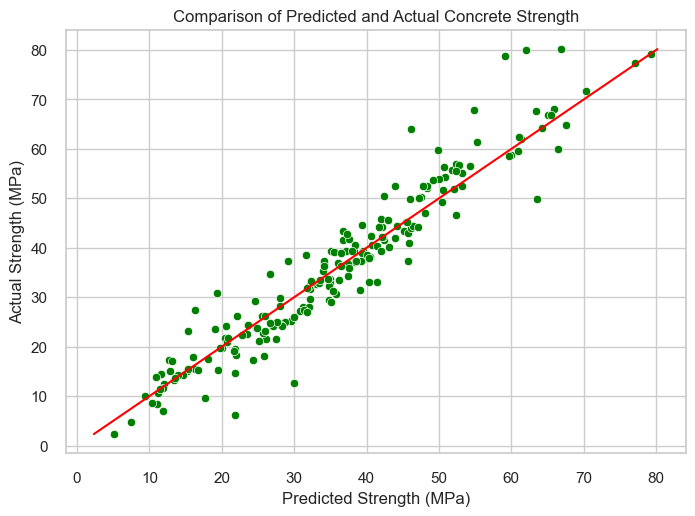

In [87]:
#TODO: predicted-actual plot

# Get the predicted strengths
y_pred = model.predict(X_test)

# Create a scatterplot of predicted vs actual strength
sns.scatterplot(x=y_pred, y=y_test, color='green')

# Add a line of unity
sns.lineplot(x=[y_test.min(), y_test.max()], y=[y_test.min(), y_test.max()], color='red')

# Add axis labels and title
plt.xlabel('Predicted Strength (MPa)')
plt.ylabel('Actual Strength (MPa)')
plt.title('Comparison of Predicted and Actual Concrete Strength')
plt.show()

### 7.3 Residual plot (1 mark)
Using a scatterplot, show predicted strength on the x axis and the *difference* between actual and predicted strength on the y axis with data from the test set. This is an alternative way to see where errors are made.

We look for residuals being distributed equally around the zero horizontal line.

Add x-axis, y-axis labels including units, and a title.



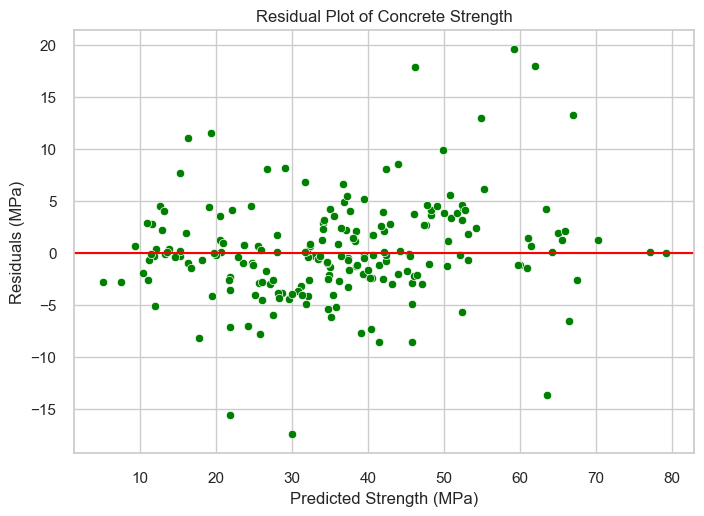

In [89]:
# TODO: Residual plot

# Get the predicted values
y_pred = model.predict(X_test)

# Get the residuals
residuals = y_test - y_pred

# Create a scatterplot of residuals vs predicted values
sns.scatterplot(x=y_pred, y=residuals, color='green')

# Add a horizontal line at y = 0
plt.axhline(y=0, color='red')

# Add axis labels and title
plt.title('Residual Plot of Concrete Strength')
plt.xlabel('Predicted Strength (MPa)')
plt.ylabel('Residuals (MPa)')
plt.show()

## 8. Conclusion (3 marks)

In conclusion, comment on the following items:
1. Did we find a model that outperforms the polynomial regression reported in the reference article? Explain.
1. Did we find a model that outperforms the neural network reported in the reference article? Explain.
1. What were our assumption about the dataset and train/test split? How do these assumptions affect your conclusions?

1. `RandomForestRegressor(max_depth=20, n_estimators=400, random_state=64)`, outperforms the polynomial regression reported in the reference article. Specifically, our model achieved a lower root mean-squared error and a higher R-squared score on the training and testing set, indicating that our model is better at predicting the strength of concrete. With a test RMS score of 4.80 MPa and a test R-squared score of 0.915, we have demonstrated the superiority of our model over the polynomial regression (RMS=8.82 MPa, R2 = 0.791) reported in the reference article.

2. Our analysis did not reveal a model that outperforms the neural network referenced in the article. Despite our best efforts, the best model we found, RandomForestRegressor(max_depth=20, n_estimators=400, random_state=64), still had a higher root mean-squared error and a lower R-squared score on the testing set (RMS=4.80 MPa, R2=0.915), compared to the neural network reported in the reference article (RMS=3.01 MPa, R2=0.929). This indicates that the neural network is more effective at predicting the strength of concrete than our best model.

3. Our machine learning analysis of the yellowbrick concrete dataset was based on a few assumptions about the data and the way we split it. First, we assumed that the dataset accurately represents all types of concrete, so that the model we built could be applied to concrete outside of the dataset. Second, we assumed that when we split the data into training and testing sets, the target variable (compressive strength) was evenly distributed between them. If it wasn't, our model might have been biased towards one target and given us incorrect conclusions. Finally, we assumed that the randomness in the way we split the data didn't create any underlying patterns that would affect our model. If there were any patterns, our model would have been less accurate. These assumptions were important to consider because they affected the accuracy of our model and its comparison to the models reported in the reference article.

## 9. Reflection (2 marks)



Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating while working on this assignment.

I found the process of creating a model and performing hyper-parameter tuning to be both interesting and rewarding. I was particularly fascinated to see how our model compared to the models reported in the reference article. The step-by-step approach we took throughout the assignment made it less challenging and more motivating.

# Appendix-A: Bonus - use grid search to find the best model parameters
### (5 potential bonus marks)

## A-0. Workflow overview

In [ ]:
import mglearn
mglearn.plots.plot_grid_search_overview()

## A-1. Hyperparameter tuning using grid search (2 marks)

The inital cross-validation above showed that both DecisionTree based models might have merit. Next, the hyperparameters are tuned using grid search.

### A-1.1 Grid search for RandomForestRegressor

Perform grid search using `GridSearchCV` for the `RandomForestRegressor(random_state=64)`.

Grid search to use 7-fold cross-validation, and `neg_root_mean_squared_error` as the scoring function.

Use the following hyperparameters and values:
- `'n_estimators': [100, 200, 400]`
- `'max_depth': [ 15, 17, 19, 21]`
- `'max_features': ['auto', 'log2', None]`


In [ ]:
# TODO: Setup grid search for RandomForestRegressor(random_state=64)


In [ ]:
# TODO: perform the grid search by calling fit()


In [ ]:
# TODO: Print the best parameters


In [ ]:
# TODO: Print the best score


### A-1.2 Grid search for gradient boosted tree

Perform grid search using `GridSearchCV` for the `GradientBoostingRegressor(random_state=79)`.

Grid search to use 7-fold cross-validation, and `neg_root_mean_squared_error` as the scoring function.

Use the following hyperparameters and values:
- `'n_estimators': [100, 200, 500]`
- `'max_depth': [1, 3, 5, 7]`
- `'learning_rate': [0.01, 0.1, 1.0]`

In [ ]:
# TODO: Setup grid search for GradientBoostingRegressor(random_state=79)


In [ ]:
# TODO: perform the grid search by calling fit()


In [ ]:
# TODO: Print the best parameters


In [ ]:
# TODO: Print the best score


### *Question A-1:* Which of the two models produces the best score? What is the best score?

*YOUR ANSWER HERE*


## A-2. Retrain best model (1 mark)

Get the best estimator from the two grid searches above and retrain this model on all training data.

In [ ]:
#TODO: retrain the best estimator



## A-3. Model evaluation and conclusion (1 mark)

Repeat steps in Section 7 above for the best model.

Revisit your Question 4.

In [ ]:
#TODO: train and test set scores of retrained best model


In [ ]:
#TODO: predicted-actual plot


In [ ]:
# TODO: Residual plot


### *Question A-4:* How does this test score compare to the polynomial regression and neural network reported in the article? Do we outperform the reported models? (1 mark)

*YOUR ANSWER HERE*
